<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Tec%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20Gleb%206-8/telecom_test_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np

In [86]:
!gdown --id 1dixOdPOIE4VwO38RZVE-e7U15d6p47lY

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dixOdPOIE4VwO38RZVE-e7U15d6p47lY
To: /content/task_k.zip
100% 13.2M/13.2M [00:00<00:00, 97.6MB/s]


In [87]:
y!unzip task_k.zip

Archive:  task_k.zip
replace task_k/hashed_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/hashed_feature.csv  
replace task_k/tabular_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/tabular_data.csv  
replace task_k/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/test.csv         
replace task_k/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/train.csv        
replace task_k/Задание.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/Задание.txt  


In [88]:
train = pd.read_csv('/content/task_k/train.csv')

In [89]:
tabular_data = pd.read_csv('/content/task_k/tabular_data.csv')

In [90]:
hash_feature = pd.read_csv('/content/task_k/hashed_feature.csv')

In [91]:
hash_feature.isna().mean()

,0
id,0.000000
feature_50,0.001518


In [92]:
hash_feature.dropna(inplace=True)

In [93]:
hashed_feature

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819
1,0,47904b3331202e9881d003ff449c2eabfbc75460
2,0,a99c4b3af723874ddd85af322beea81b64437294
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8
4,0,d62db721202cb6636887f450a7b77fa97db03b05
...,...,...
266048,5104,b800c944804d341038e06d26cf560562942069e9
266049,5104,442e9a74e42ad60348408428654a686c4ed222ee
266050,5105,ff3c67182640fdbd26d2273a87c3311f45c68ae2
266051,5105,95ea6c6f652cb29edc327a2449eb8115ebc6841e


In [94]:
hash_joined = hash_feature.groupby('id')['feature_50'].apply(lambda x: ' '.join(x)).reset_index()

In [95]:
hash_joined

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,db6e2207646e991c7c196063bdc9377fb416c732 745dd...
...,...,...
5099,5101,b50e6165624dc0f22b903721073c83c9c4bf8e74 bb50d...
5100,5102,79f660e95ae1317367600f5d6e98fde88419e787 6d1fc...
5101,5103,82ceabdac9000e930721b094494ff2ad2266134f c161a...
5102,5104,5123d0309f8aa93858132ea6adf7ad12f636a391 e9649...


In [96]:
df = train.merge(hash_joined,how='left',on='id')

In [97]:
df.head()

,id,target,feature_50
0,0,0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,0,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,1,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,0,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,1,db6e2207646e991c7c196063bdc9377fb416c732 745dd...


In [98]:
df.isna().mean()

,0
id,0.000000
target,0.000000
feature_50,0.000245


In [99]:
df.dropna(inplace=True)

In [100]:
df.isna().mean()

,0
id,0.0
target,0.0
feature_50,0.0


In [101]:
train = df.sample(frac=0.7,random_state=42).copy()

In [102]:
val = df[~df.index.isin(train.index)]

In [103]:
len(train) + len(val)

4083

In [104]:
!pip install catboost

In [105]:
X_col = ['feature_50']
y_col = ['target']
text_features = ['feature_50']

In [106]:
from catboost import CatBoostClassifier

In [107]:
model = CatBoostClassifier(learning_rate=0.01,verbose=100,eval_metric='AUC',

                           text_features=text_features,
                           )
model.fit(train[X_col],train[y_col],eval_set=(val[X_col],val[y_col]),early_stopping_rounds=100)


0:	test: 0.5217302	best: 0.5217302 (0)	total: 362ms	remaining: 6m 1s
100:	test: 0.6318352	best: 0.6428454 (34)	total: 31.1s	remaining: 4m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6428454068
bestIteration = 34

Shrink model to first 35 iterations.


In [136]:
fi = pd.DataFrame({'name':X_col,'w':model.feature_importances_})
fi

,name,w
0,feature_50,100.0


In [108]:
hash_joined['feature_50']

,feature_50
0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,db6e2207646e991c7c196063bdc9377fb416c732 745dd...
...,...
5099,b50e6165624dc0f22b903721073c83c9c4bf8e74 bb50d...
5100,79f660e95ae1317367600f5d6e98fde88419e787 6d1fc...
5101,82ceabdac9000e930721b094494ff2ad2266134f c161a...
5102,5123d0309f8aa93858132ea6adf7ad12f636a391 e9649...


In [109]:
tabular_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [110]:
tabular_data['feature_41'].mean()

np.float64(0.0)

In [111]:
try:
  tabular_data.drop('feature_41',axis=1,inplace=True)
except:
  pass

In [112]:
tabular_data[tabular_data['id'] == 0]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0.00,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,15.75,0.00,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.00,0.07,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0.00,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,26.75,0.95,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83,0.0
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,NaN,...,38.37,0.24,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20,0.0
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,NaN,...,0.00,1.56,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97,0.0
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,NaN,...,0.00,1.17,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95,0.0
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,NaN,...,0.00,0.37,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97,0.0
9,0,10,110.0,60.00,0.129596,1099.289203,608.28,0.0,0.438465,NaN,...,0.00,0.33,18.577763,0.0,55.75,1.0,0.571826,151.0,500.32,0.0


In [113]:
tabular_data[tabular_data['id'] == 0]['feature_6'].mean()

np.float64(0.44533218824971676)

In [114]:
tabular_data[tabular_data['id'] == 2]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
24,2,1,110.0,1.17,NaN,0.000000,4.05,0.0,0.603306,NaN,...,0.0,0.00,0.000000,0.0,1.17,0.0,0.258322,18.0,2.97,0.0
25,2,2,110.0,0.00,NaN,1.696433,31.55,0.0,0.561896,NaN,...,0.0,1.43,0.000987,0.0,0.00,0.0,0.168614,43.0,18.53,0.0
26,2,3,111.0,0.00,NaN,0.000000,0.00,0.0,0.293535,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.123248,1.0,0.00,0.0
27,2,4,110.0,0.00,NaN,0.000000,0.55,0.0,0.410363,NaN,...,0.0,0.02,0.000000,0.0,0.00,0.0,0.120390,10.0,0.53,0.0
28,2,5,111.0,0.00,NaN,0.000000,0.00,0.0,0.297032,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.143256,0.0,0.00,0.0
29,2,6,110.0,0.00,NaN,0.000000,4.20,0.0,0.210948,NaN,...,0.0,2.43,0.000000,0.0,0.00,0.0,0.106082,9.0,1.77,0.0
30,2,7,110.0,0.00,5.203073,0.000000,0.18,0.0,0.119820,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.108917,6.0,0.00,0.0
31,2,8,110.0,0.00,NaN,0.000000,2.12,0.0,0.557776,NaN,...,0.0,0.77,0.000000,0.0,0.00,0.0,0.280998,4.0,1.35,0.0
32,2,9,110.0,6.00,NaN,0.000000,0.45,0.0,0.752144,NaN,...,0.0,0.13,0.000000,0.0,6.00,0.0,0.267303,4.0,0.22,0.0
33,2,10,110.0,0.00,NaN,0.000000,3.38,0.0,5.160770,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.269059,18.0,2.45,0.0


In [115]:
tabular_data[tabular_data['id'] == 2]['feature_6'].mean()

np.float64(0.8750142503174243)

In [116]:
train

,id,target,feature_50
599,599,1,610e5eb9ab3b20e91f87fca45bbd503026ed850b fd5d5...
752,752,0,f8c0d4314358167ff143e44b5d4f212ff22bbf52 eaeff...
2775,2775,0,2dd869f0ad1c5aaa372f751bd87b6797ea679563 3f983...
2929,2929,1,211c2e4a55192e09f5054fa0ae58fab6ab4d0460 27376...
2513,2513,1,7b5aa9f2b936ee5953d3c36d946d84795e415d1c 38b81...
...,...,...,...
3314,3314,0,2ac29c37297d8db57f702bd6557d405e7c2a3ae0 7984b...
3323,3323,0,4f3ddb232613c6ecc6000e84c05fe1a42858f4ab 8f3c3...
375,375,1,b1cbe9d0e6da7d3296e4ee0e8a8c64f5db5516a7 24895...
1908,1908,0,9cc35e91f9c0aa2bdd08df9e7cbb2a00a095912e 342ab...


In [117]:
len(train)

2858

In [118]:
df = tabular_data.merge(train[['id','target']],on='id').copy()

In [120]:
df.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0,0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0,0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0,0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0,0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0,0


In [121]:
len(df)

34296

In [122]:
df.groupby('target')['feature_6'].agg(['count','mean','median'])

,count,mean,median
target,,,
0,23577,0.527250,0.432165
1,8711,0.697628,0.637733


In [124]:
import hashlib
print(len(hashlib.md5("23443".encode('utf-8')).hexdigest()))

32


In [125]:
hash_feature['feature_50'].str.len().mean()

np.float64(40.0)

In [126]:
df.groupby('target')['feature_46'].agg(['count','mean','median'])

,count,mean,median
target,,,
0,21758,0.367201,0.313686
1,7966,0.578354,0.741600


In [128]:
df.groupby('feature_25')['target'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
feature_25,,
cf3cca1da7361bd988642600e76c4a3021be8ccf,54,0.481481
d458ece2abeae803254c5d442b2e2a80f58a4153,193,0.393782
f9ae10397ed62e79c644d06842bbcd92963a5927,20861,0.289727
390c481a740bb1c12c57f33dc5263ced2ab11796,797,0.250941
11e623a37e87cf7995c466723ec99688d55cae8c,2217,0.244475
b204e1e3743cc314841070435211e25f4602b9fd,7251,0.234450
aa2c96dacf00c451ef465f6115a45a20bccf1256,2920,0.186301
cf7413906c99be47067cb3fb6299959857710d77,3,0.000000


In [130]:
df['feature_25'].value_counts(normalize=True)

,proportion
feature_25,
f9ae10397ed62e79c644d06842bbcd92963a5927,0.608263
b204e1e3743cc314841070435211e25f4602b9fd,0.211424
aa2c96dacf00c451ef465f6115a45a20bccf1256,0.085141
11e623a37e87cf7995c466723ec99688d55cae8c,0.064643
390c481a740bb1c12c57f33dc5263ced2ab11796,0.023239
d458ece2abeae803254c5d442b2e2a80f58a4153,0.005627
cf3cca1da7361bd988642600e76c4a3021be8ccf,0.001575
cf7413906c99be47067cb3fb6299959857710d77,0.000087


<Axes: >

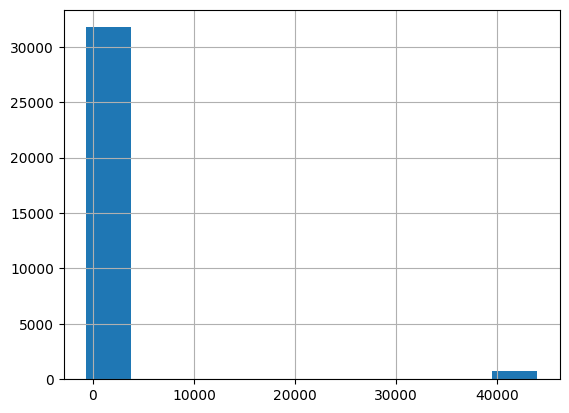

In [137]:
df['feature_11'].hist()